In [102]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#pre-processing
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing import StandardScaler
## Models
from sklearn.ensemble import RandomForestClassifier
## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [103]:
df = pd.read_csv('HR Employee Attrition.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# 1) Análise Exploratória:
- a) Mostrar no formato de violin plot a distribuição dos dados do atributo tipo de cargo ``JobRole``.

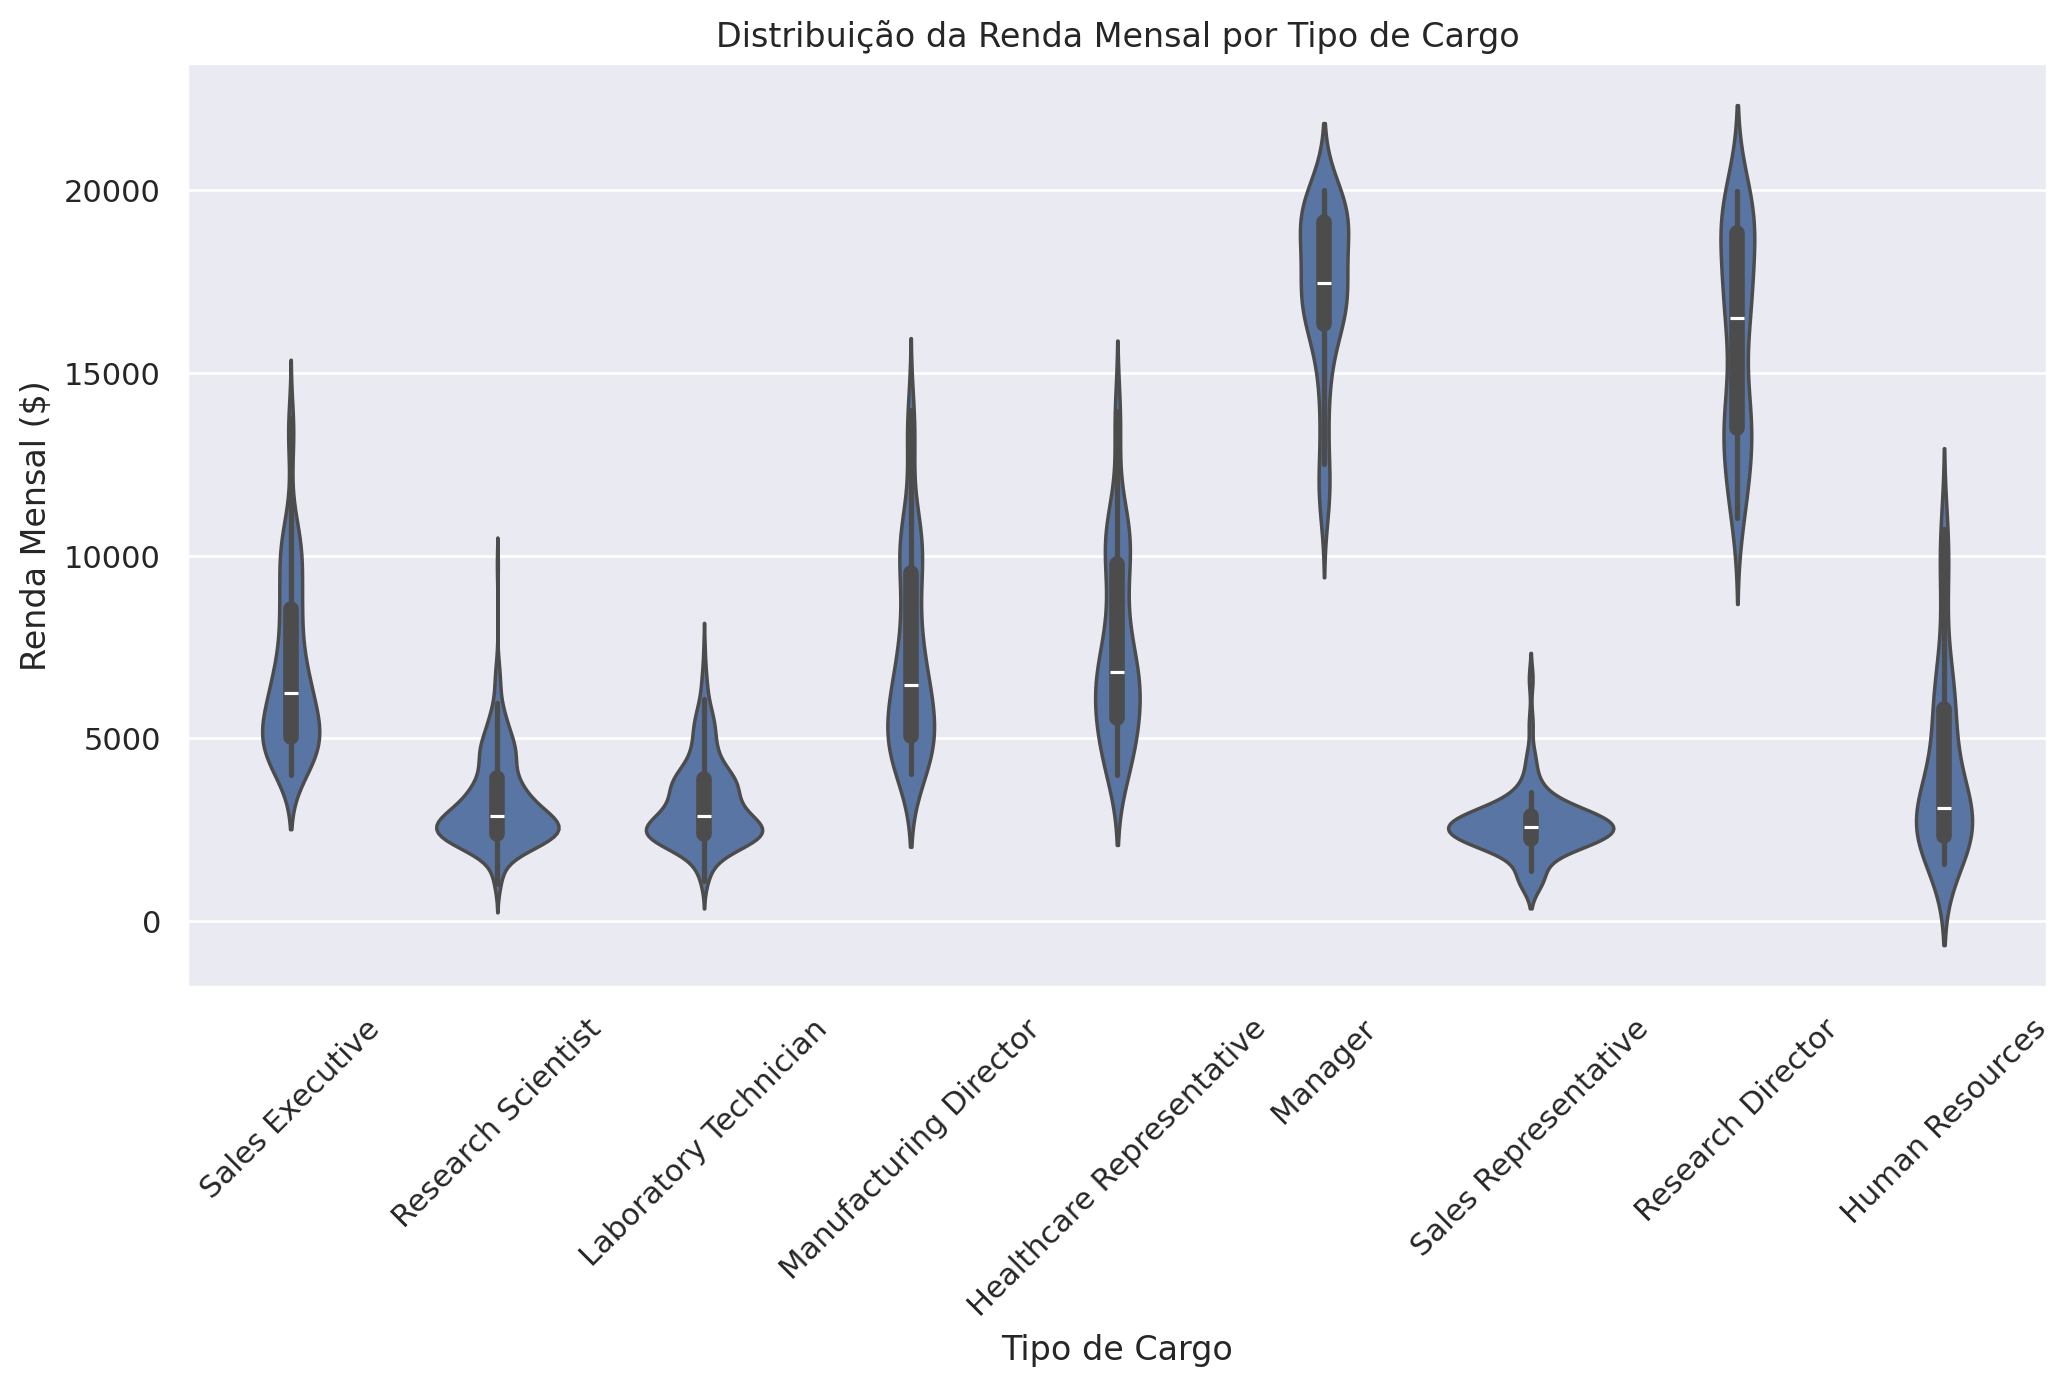

In [105]:
plt.figure(figsize=(12, 6))

sns.violinplot(x='JobRole', y='MonthlyIncome', data=df)

plt.xticks(rotation=45)
plt.title('Distribuição da Renda Mensal por Tipo de Cargo')
plt.xlabel('Tipo de Cargo')
plt.ylabel('Renda Mensal ($)')

#plt.tight_layout()
plt.show()

# 1-b)
-  Apresentar a renda média mensal ``MonthlyIncome`` por escolaridade ``EducationField`` e desgaste ``Attrition``.
Utilizar Pandas Groupby.

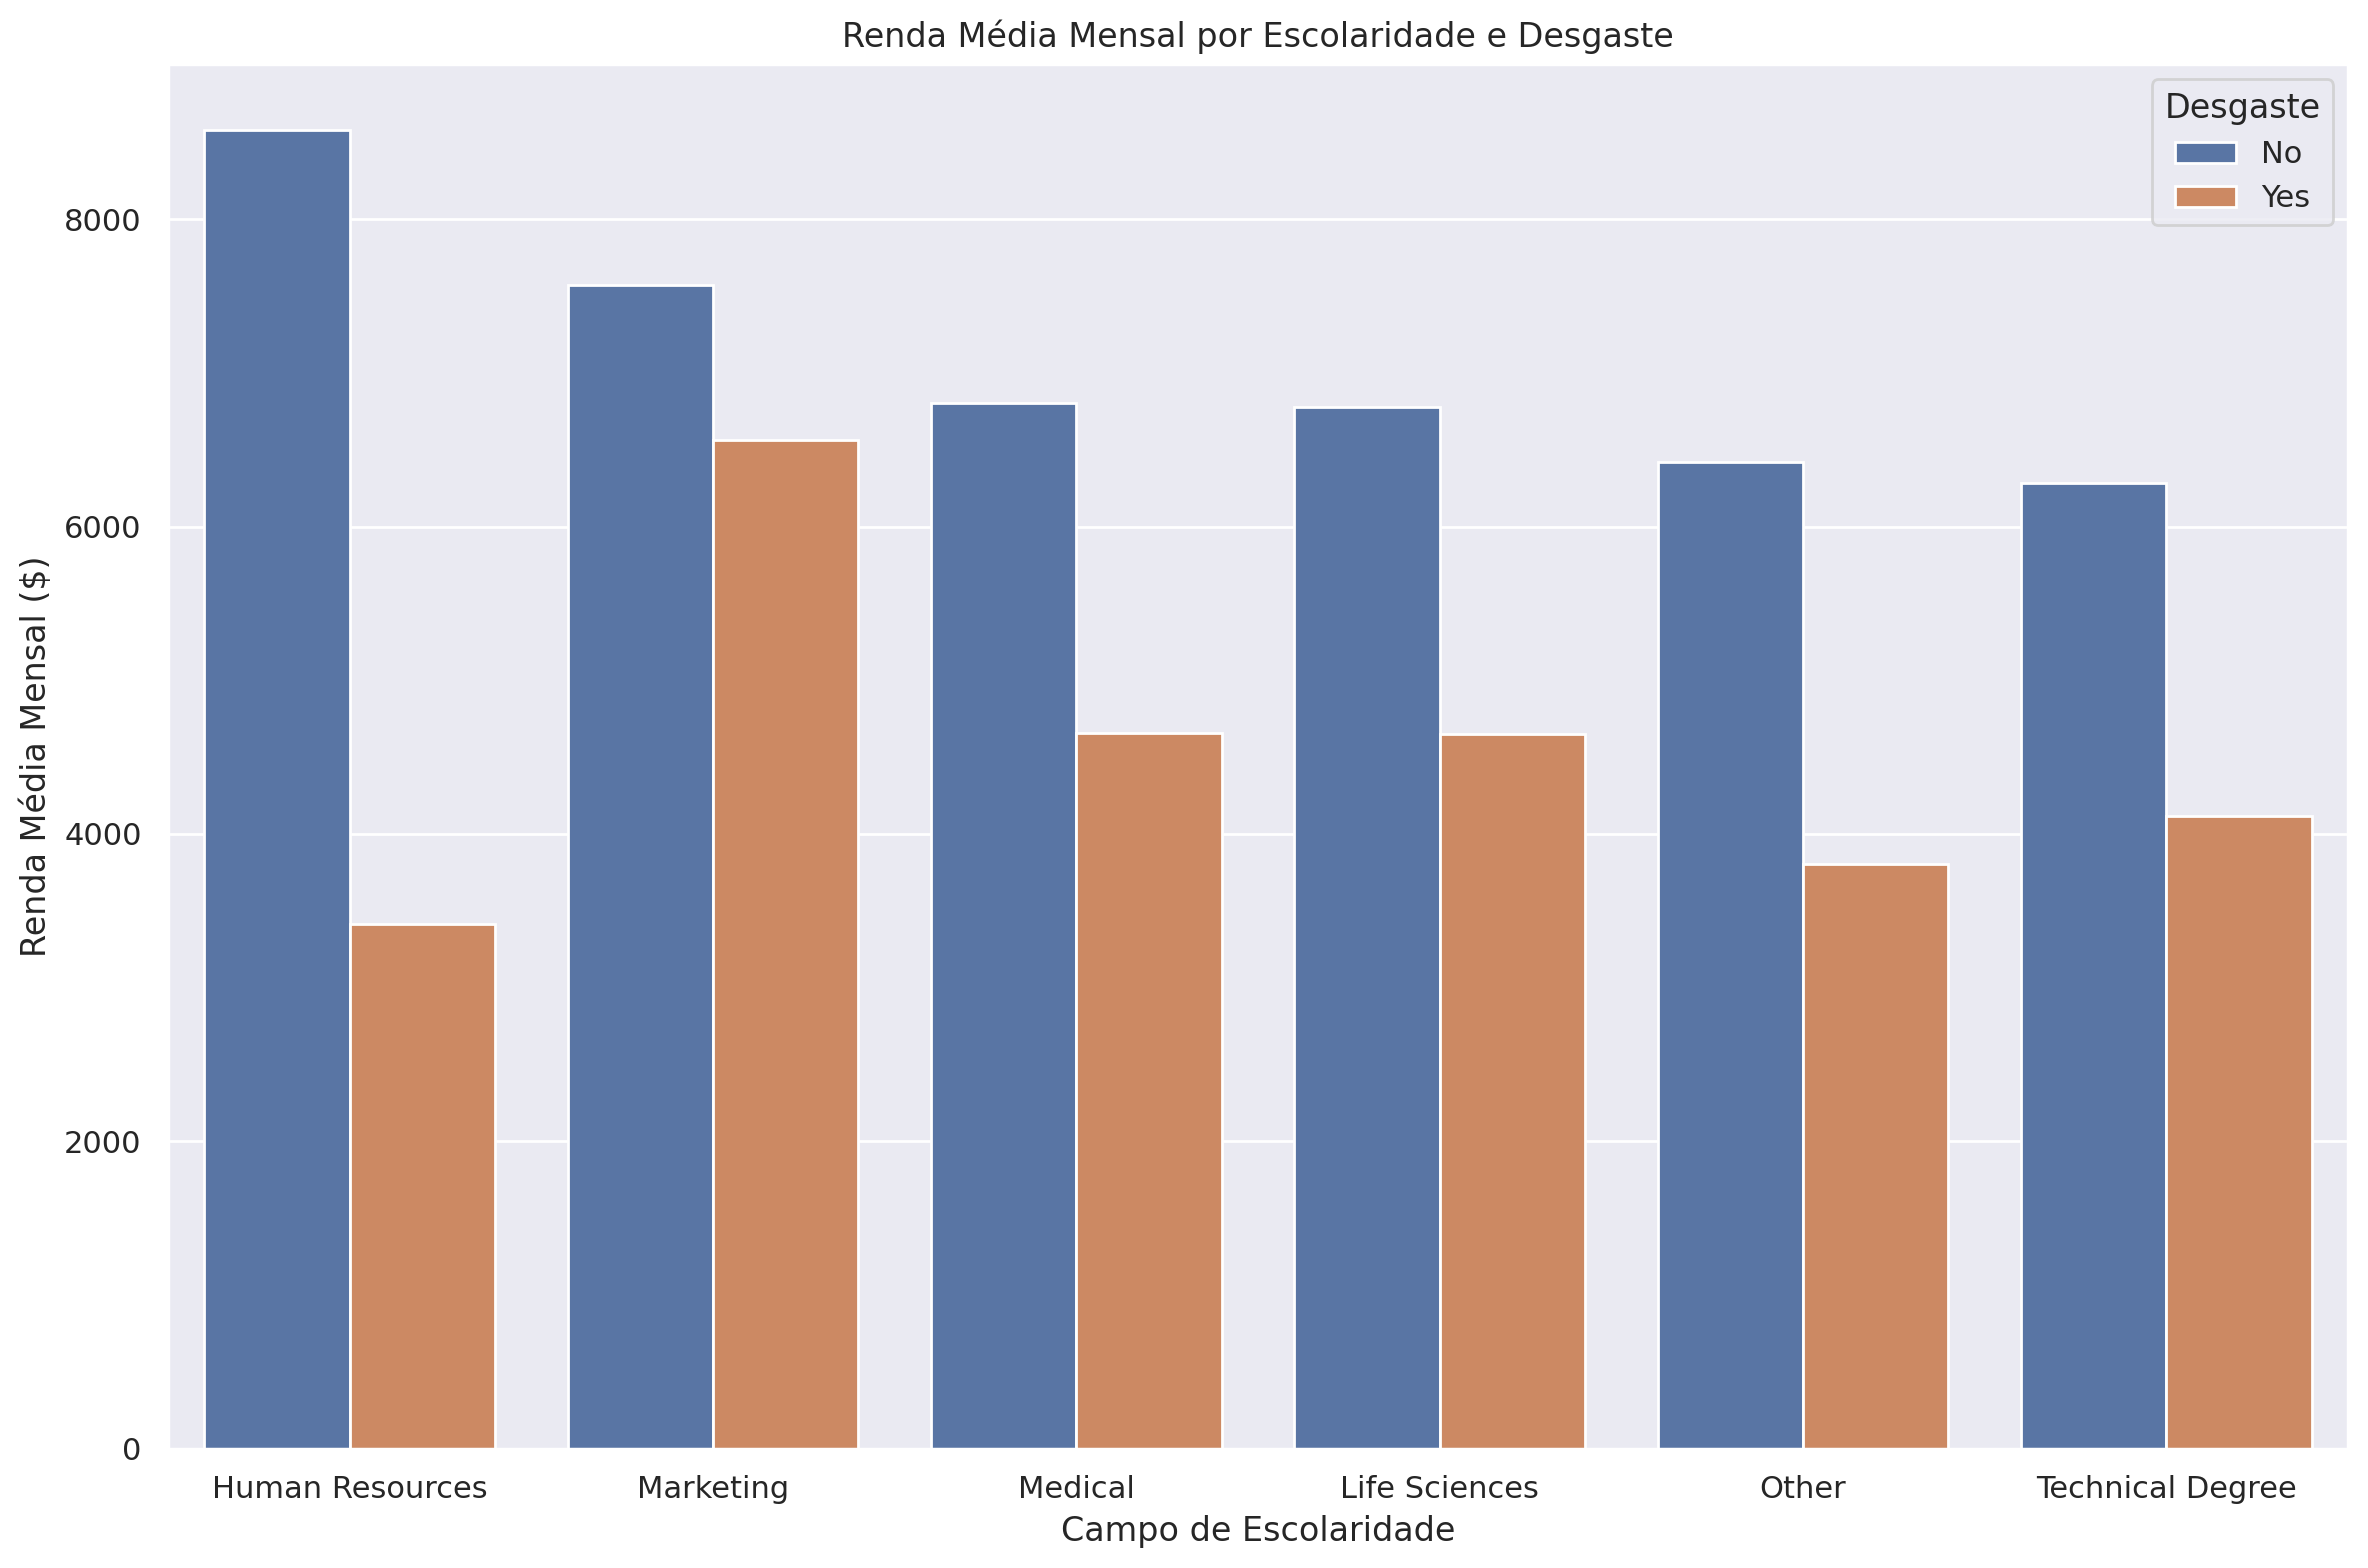

In [106]:
# Calculando a renda média mensal por escolaridade (EducationField) e desgaste (Attrition)
mean_monthly_income = df.groupby(['EducationField', 'Attrition'])['MonthlyIncome'].mean().reset_index()

# Ordenando os valores para o gráfico de barras
mean_monthly_income_sorted = mean_monthly_income.sort_values(by='MonthlyIncome', ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='EducationField', y='MonthlyIncome', hue='Attrition', data=mean_monthly_income_sorted)

plt.title('Renda Média Mensal por Escolaridade e Desgaste')
plt.xlabel('Campo de Escolaridade')
plt.ylabel('Renda Média Mensal ($)')
plt.legend(title='Desgaste')

# Mostrando o gráfico
plt.tight_layout()
plt.show()

In [107]:
# Analisar as variáveis to encode
categorical_columns = df.select_dtypes(include=['object']).columns

for categorical_feature in categorical_columns:
  print(f'{categorical_feature}: {df[categorical_feature].unique()}')

Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
Over18: ['Y']
OverTime: ['Yes' 'No']


In [108]:
# no missing values
df.isna().any().any()

False

In [109]:
#colunas irrelevantes
df.drop(['EmployeeCount', 'EmployeeNumber','Over18','StandardHours'],axis=1, inplace=True)

# 2) Pré-processamento
## Encoding categorical values

In [110]:
categorical_column = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [111]:
encoder = LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

In [112]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [113]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [114]:
scaler_cols = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

## Normalizar

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ajuste = scaler.fit(df[scaler_cols])
df[scaler_cols] = ajuste.transform(df[scaler_cols])

## Separating into X and y

In [116]:
y=df['Attrition'] 
X=df.drop(['Attrition'],axis=1)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [118]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.pipeline import Pipeline

In [119]:
# Define the classifier
classifier = RandomForestClassifier(n_estimators=100)

In [120]:
# SmartCorrelatedSelection is available from feature_engine.selection
from feature_engine.selection import SmartCorrelatedSelection

# Define feature selection techniques
feature_selection_techniques = {
    "ANOVA": SelectKBest(f_classif, k=10),
    "Mutual Information": SelectKBest(mutual_info_classif, k=10),
    "SmartCorrelatedGroups": SmartCorrelatedSelection(variables=None, method="pearson", threshold=0.8)
}

In [121]:
pipelines = {}
results = {}

for fs_name, fs in feature_selection_techniques.items():
    pipeline_name = f"RandomForest with {fs_name}"
    
    # Define and fit the pipeline
    pipeline = Pipeline([
        ('feature_selection', fs),
        ('classifier', classifier)
    ])
    
    pipeline.fit(X_train, y_train)
    pred = pipeline.predict(X_test)
    
    # Calculate accuracy and print results
    acc = accuracy_score(y_test, pred)
    print(f"{pipeline_name} Accuracy: {acc}")
    
    # Store the fitted pipeline and results for later analysis
    pipelines[pipeline_name] = pipeline
    results[pipeline_name] = acc

RandomForest with ANOVA Accuracy: 0.8480725623582767
RandomForest with Mutual Information Accuracy: 0.8344671201814059
RandomForest with SmartCorrelatedGroups Accuracy: 0.8412698412698413


In [122]:
# similaridade das features
features_by_selector = {}

for name, pipeline in pipelines.items():
    print(f"Processing pipeline: {name}")  # Debug print to show which pipeline is currently being processed
    feature_selection_step = pipeline.named_steps['feature_selection']
    if hasattr(feature_selection_step, 'get_feature_names_out'):
        # For methods that directly support
        feature_names = feature_selection_step.get_feature_names_out(input_features=X_train.columns)
    elif hasattr(feature_selection_step, 'get_support'):
        # For methods that provide a boolean mask
        selected_mask = feature_selection_step.get_support()
        feature_names = X_train.columns[selected_mask].tolist()
        print(f"{name} with Boolean Mask")  # Debug print for boolean mask method
    else:
        feature_names = None
        print(f"{name} with No Feature Names")  # Debug print when no feature names can be determined
    
    features_by_selector[name] = feature_names

Processing pipeline: RandomForest with ANOVA
Processing pipeline: RandomForest with Mutual Information
Processing pipeline: RandomForest with SmartCorrelatedGroups


In [123]:
# Extrair os conjuntos de features de "Mutual Information", "Drop Correlated", 'ANOVA'
mutual_information_features = features_by_selector.get("RandomForest with Mutual Information", [])
drop_correlated_features = features_by_selector.get("RandomForest with SmartCorrelatedGroups", [])
anova_correlated_features = features_by_selector.get("RandomForest with ANOVA", [])

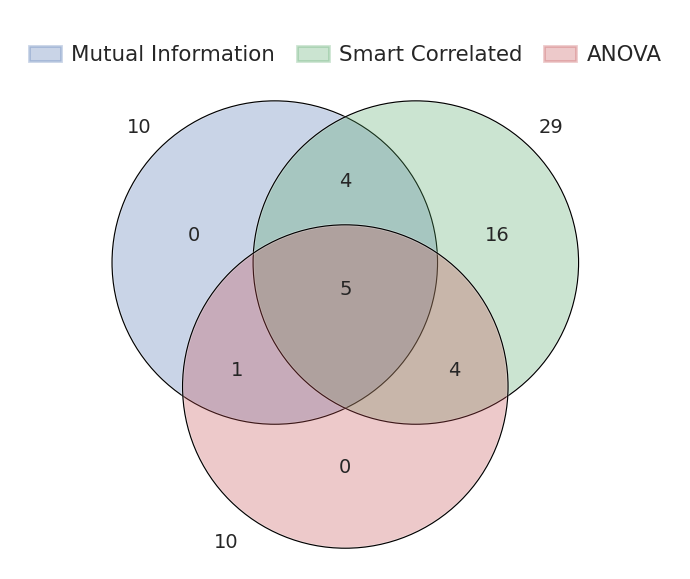

In [124]:
from venny4py.venny4py import *

sets = {
    'Mutual Information': set(mutual_information_features),
    'Smart Correlated': set(drop_correlated_features),
    'ANOVA': set(anova_correlated_features)
}
# Gerar o diagrama de Venn
venny4py(sets=sets)

In [125]:
set(mutual_information_features).intersection(drop_correlated_features,anova_correlated_features)

{'Age', 'JobLevel', 'OverTime', 'TotalWorkingYears', 'YearsAtCompany'}

# 3)

In [126]:
# Selecionar features específicas para X
X = df[['Age', 'MaritalStatus', 'OverTime', 'StockOptionLevel', 'YearsAtCompany']]

# Definir a variável target
y = df['Attrition']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [128]:
# Define classifiers
classifiers = {
    "DecisionTree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100)
}

In [129]:
# Define feature selection techniques
feature_selection_techniques = {
    "Mutual Information": SelectKBest(mutual_info_classif, k=3),
    "ANOVA": SelectKBest(f_classif, k=3),
    'SmartCorrelatedGroups': SmartCorrelatedSelection(variables=None, method="pearson", threshold=0.8)
}

In [130]:
# Armazenamento dos pipelines
pipelines = {}
results = {}

# Loop through classifiers and feature selection techniques
for clf_name, clf in classifiers.items():
    for fs_name, fs in feature_selection_techniques.items():
        pipeline_name = f"{clf_name} with {fs_name}"
        # Define and fit pipeline
        pipeline = Pipeline([('feature_selection', fs), ('classifier', clf)])
        pipeline.fit(X_train, y_train)
        pred = pipeline.predict(X_test)
        
        # Calculate accuracy and print results
        acc = accuracy_score(y_test, pred)
        print(f"{pipeline_name} Accuracy: {acc}")
        results[pipeline_name] = acc
        
        # Store the fitted pipeline for later analysis
        pipelines[pipeline_name] = pipeline

DecisionTree with Mutual Information Accuracy: 0.8140589569160998
DecisionTree with ANOVA Accuracy: 0.8140589569160998
DecisionTree with SmartCorrelatedGroups Accuracy: 0.7687074829931972
KNN with Mutual Information Accuracy: 0.8344671201814059
KNN with ANOVA Accuracy: 0.8208616780045351
KNN with SmartCorrelatedGroups Accuracy: 0.8253968253968254
RandomForest with Mutual Information Accuracy: 0.8208616780045351
RandomForest with ANOVA Accuracy: 0.8072562358276644
RandomForest with SmartCorrelatedGroups Accuracy: 0.7981859410430839


In [131]:
# Initialize a dictionary to store predictions
predictions = {}

# Assuming the loop and pipeline setup from the previous response here
# After fitting each pipeline, store predictions
for clf_name, clf in classifiers.items():
    for fs_name, fs in feature_selection_techniques.items():
        pipeline_name = f"{clf_name} with {fs_name}"
        # Fit and predict inside the loop as before
        pipeline.fit(X_train, y_train)
        pred = pipeline.predict(X_test)
        predictions[pipeline_name] = pred  # Store predictions

# Now, calculate and print metrics for each set of predictions
for name, pred in predictions.items():
    print(f">> Metrics for: {name}")
    print("ACC: {:.3f}".format(accuracy_score(y_test, pred)))
    print("Recall: {:.2f}".format(recall_score(y_test, pred, average='binary')))
    print("Precision: {:.2f}".format(precision_score(y_test, pred, average='binary')))
    print("F1-score: {:.2f}".format(f1_score(y_test, pred, average='binary')))
    print()  # Print a blank line for readability

>> Metrics for: DecisionTree with Mutual Information
ACC: 0.803
Recall: 0.18
Precision: 0.37
F1-score: 0.24

>> Metrics for: DecisionTree with ANOVA
ACC: 0.810
Recall: 0.17
Precision: 0.39
F1-score: 0.24

>> Metrics for: DecisionTree with SmartCorrelatedGroups
ACC: 0.803
Recall: 0.18
Precision: 0.37
F1-score: 0.24

>> Metrics for: KNN with Mutual Information
ACC: 0.796
Recall: 0.17
Precision: 0.33
F1-score: 0.22

>> Metrics for: KNN with ANOVA
ACC: 0.805
Recall: 0.18
Precision: 0.38
F1-score: 0.25

>> Metrics for: KNN with SmartCorrelatedGroups
ACC: 0.810
Recall: 0.18
Precision: 0.40
F1-score: 0.25

>> Metrics for: RandomForest with Mutual Information
ACC: 0.800
Recall: 0.18
Precision: 0.36
F1-score: 0.24

>> Metrics for: RandomForest with ANOVA
ACC: 0.794
Recall: 0.18
Precision: 0.33
F1-score: 0.24

>> Metrics for: RandomForest with SmartCorrelatedGroups
ACC: 0.812
Recall: 0.21
Precision: 0.42
F1-score: 0.28



### Hyperparameter tuning

- Next steps to be taken:

1.    Tune model hyperparameters
2.    Perform cross-validation
3.    Plot ROC curves
4.    Make a confusion matrix
5.    Get precision, recall and F1-score metrics
6.    Find the most important model features

## Tuning models with with RandomizedSearchCV

In [132]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [133]:
# Setup random seed
np.random.seed(90)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [134]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 760,
 'min_samples_split': 16,
 'min_samples_leaf': 15,
 'max_depth': 10}

In [135]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8299319727891157

In [136]:
# Make preidctions on test data
y_preds = rs_rf.predict(X_test)
y_preds

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [137]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[361   3]
 [ 72   5]]


In [138]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91       364
           1       0.62      0.06      0.12        77

    accuracy                           0.83       441
   macro avg       0.73      0.53      0.51       441
weighted avg       0.80      0.83      0.77       441



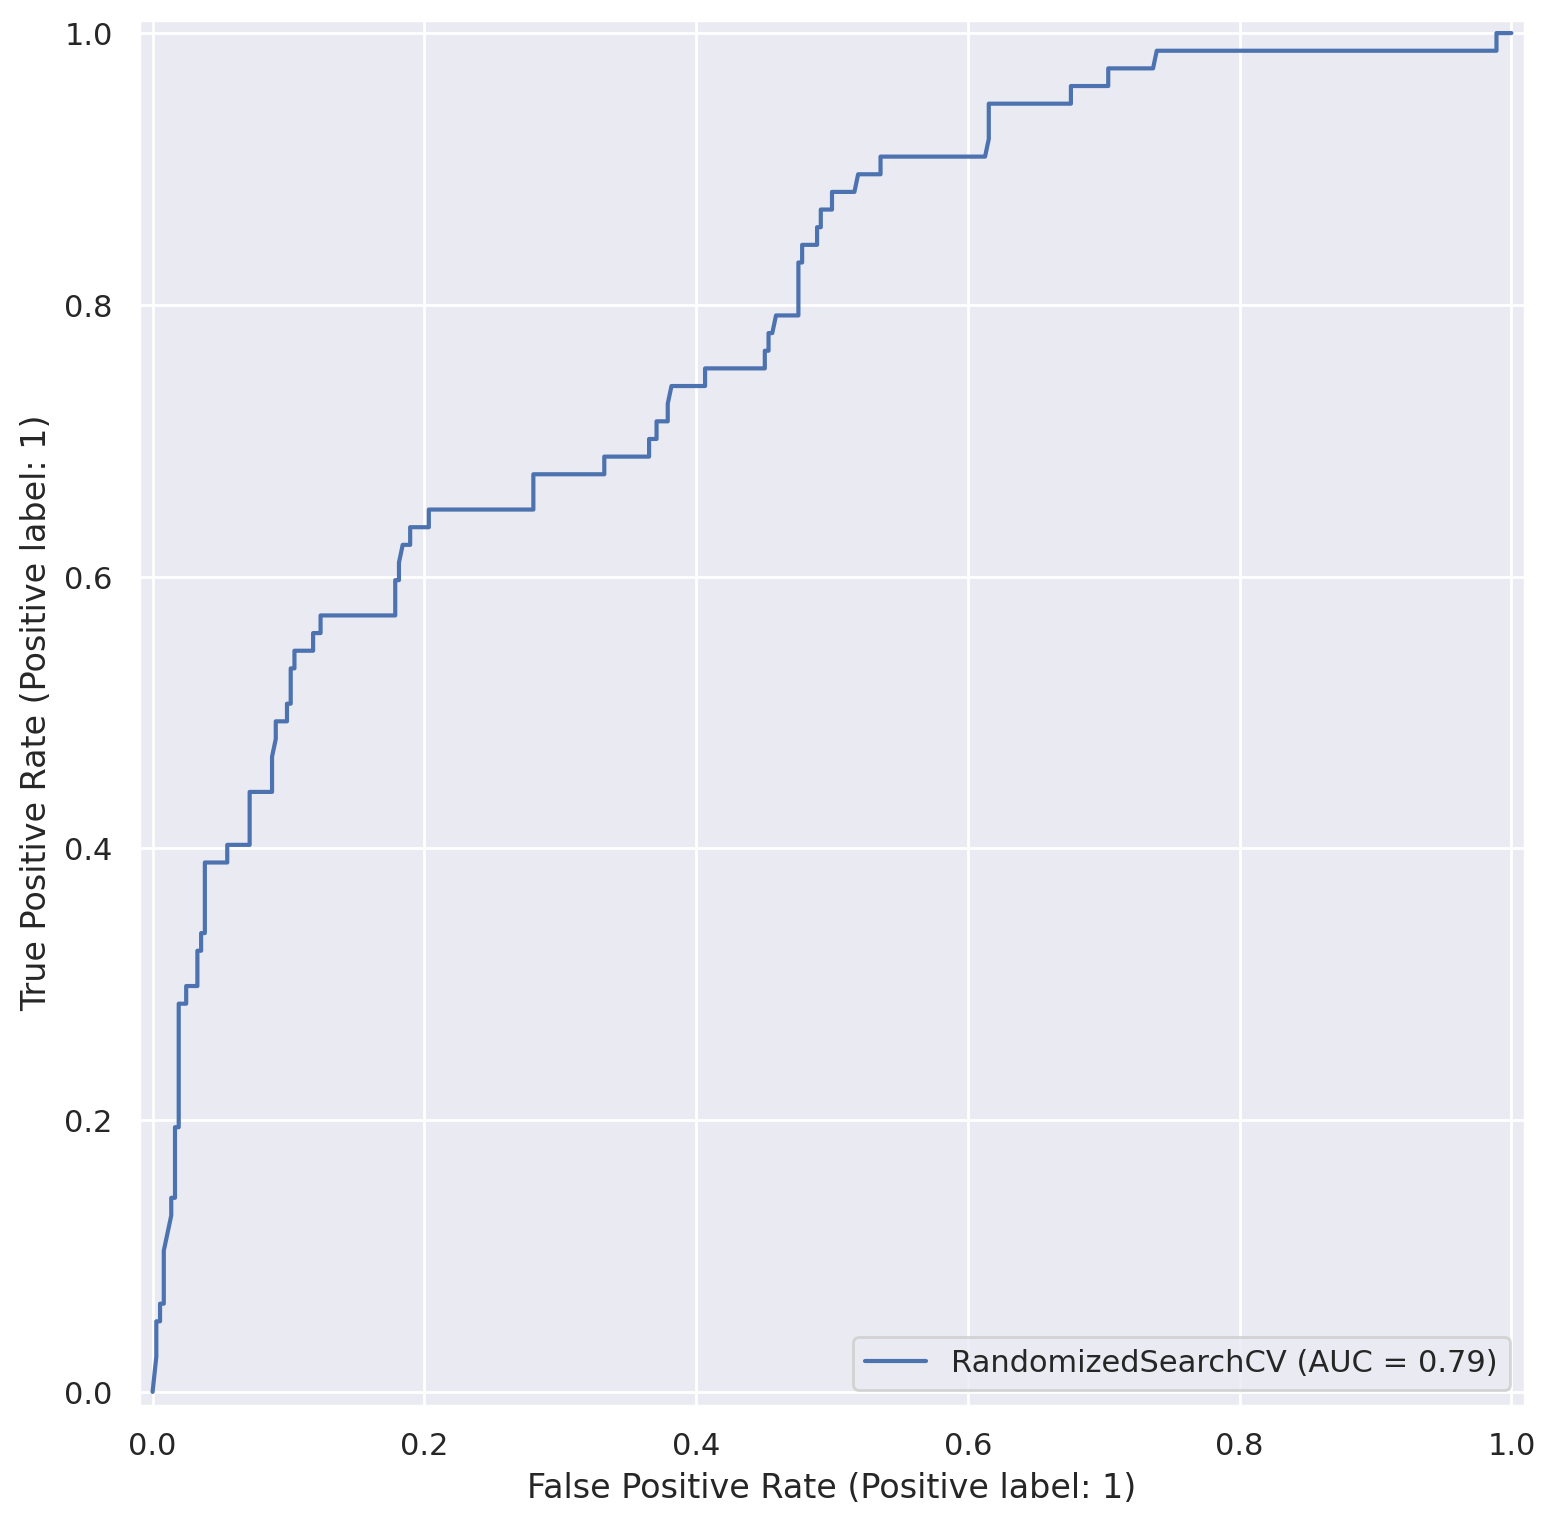

In [139]:
# Import ROC curve function from metrics module
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(rs_rf, X_test, y_test)

In [140]:
# Check best hyperparameters
rs_rf.best_params_

{'n_estimators': 760,
 'min_samples_split': 16,
 'min_samples_leaf': 15,
 'max_depth': 10}

## Next, refine the search with GridSearchCV based on the outcomes of RandomizedSearchCV:

In [141]:
# Define the parameter grid based on the results of RandomizedSearchCV
param_grid = {
    'n_estimators': [700, 725, 750, 775, 800],
    'min_samples_split': [14, 15, 16, 17, 18],
    'min_samples_leaf': [13, 14, 15, 16, 17], 
    'max_depth': [8, 9, 10, 11, 12]           
}

In [142]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)

In [143]:
# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 625 candidates, totalling 1875 fits
[CV] END max_depth=8, min_samples_leaf=13, min_samples_split=14, n_estimators=725; total time=   1.0s
[CV] END max_depth=8, min_samples_leaf=13, min_samples_split=15, n_estimators=700; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=13, min_samples_split=15, n_estimators=775; total time=   1.1s
[CV] END max_depth=8, min_samples_leaf=13, min_samples_split=16, n_estimators=750; total time=   1.0s
[CV] END max_depth=8, min_samples_leaf=13, min_samples_split=17, n_estimators=725; total time=   1.0s
[CV] END max_depth=8, min_samples_leaf=13, min_samples_split=18, n_estimators=700; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=13, min_samples_split=18, n_estimators=800; total time=   1.1s
[CV] END max_depth=8, min_samples_leaf=14, min_samples_split=14, n_estimators=775; total time=   1.1s
[CV] END max_depth=8, min_samples_leaf=14, min_samples_split=15, n_estimators=750; total time=   1.0s
[CV] END max_depth

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10, 11, 12],
                         'min_samples_leaf': [13, 14, 15, 16, 17],
                         'min_samples_split': [14, 15, 16, 17, 18],
                         'n_estimators': [700, 725, 750, 775, 800]},
             verbose=2)

In [144]:
grid_search.best_params_

{'max_depth': 8,
 'min_samples_leaf': 13,
 'min_samples_split': 14,
 'n_estimators': 725}

In [145]:
# Evaluate the randomized search random forest model
grid_search.score(X_test, y_test)

0.8321995464852607

In [146]:
# Make preidctions on test data
y_preds = grid_search.predict(X_test)

In [147]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[361   3]
 [ 71   6]]


In [148]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       364
           1       0.67      0.08      0.14        77

    accuracy                           0.83       441
   macro avg       0.75      0.53      0.52       441
weighted avg       0.81      0.83      0.77       441



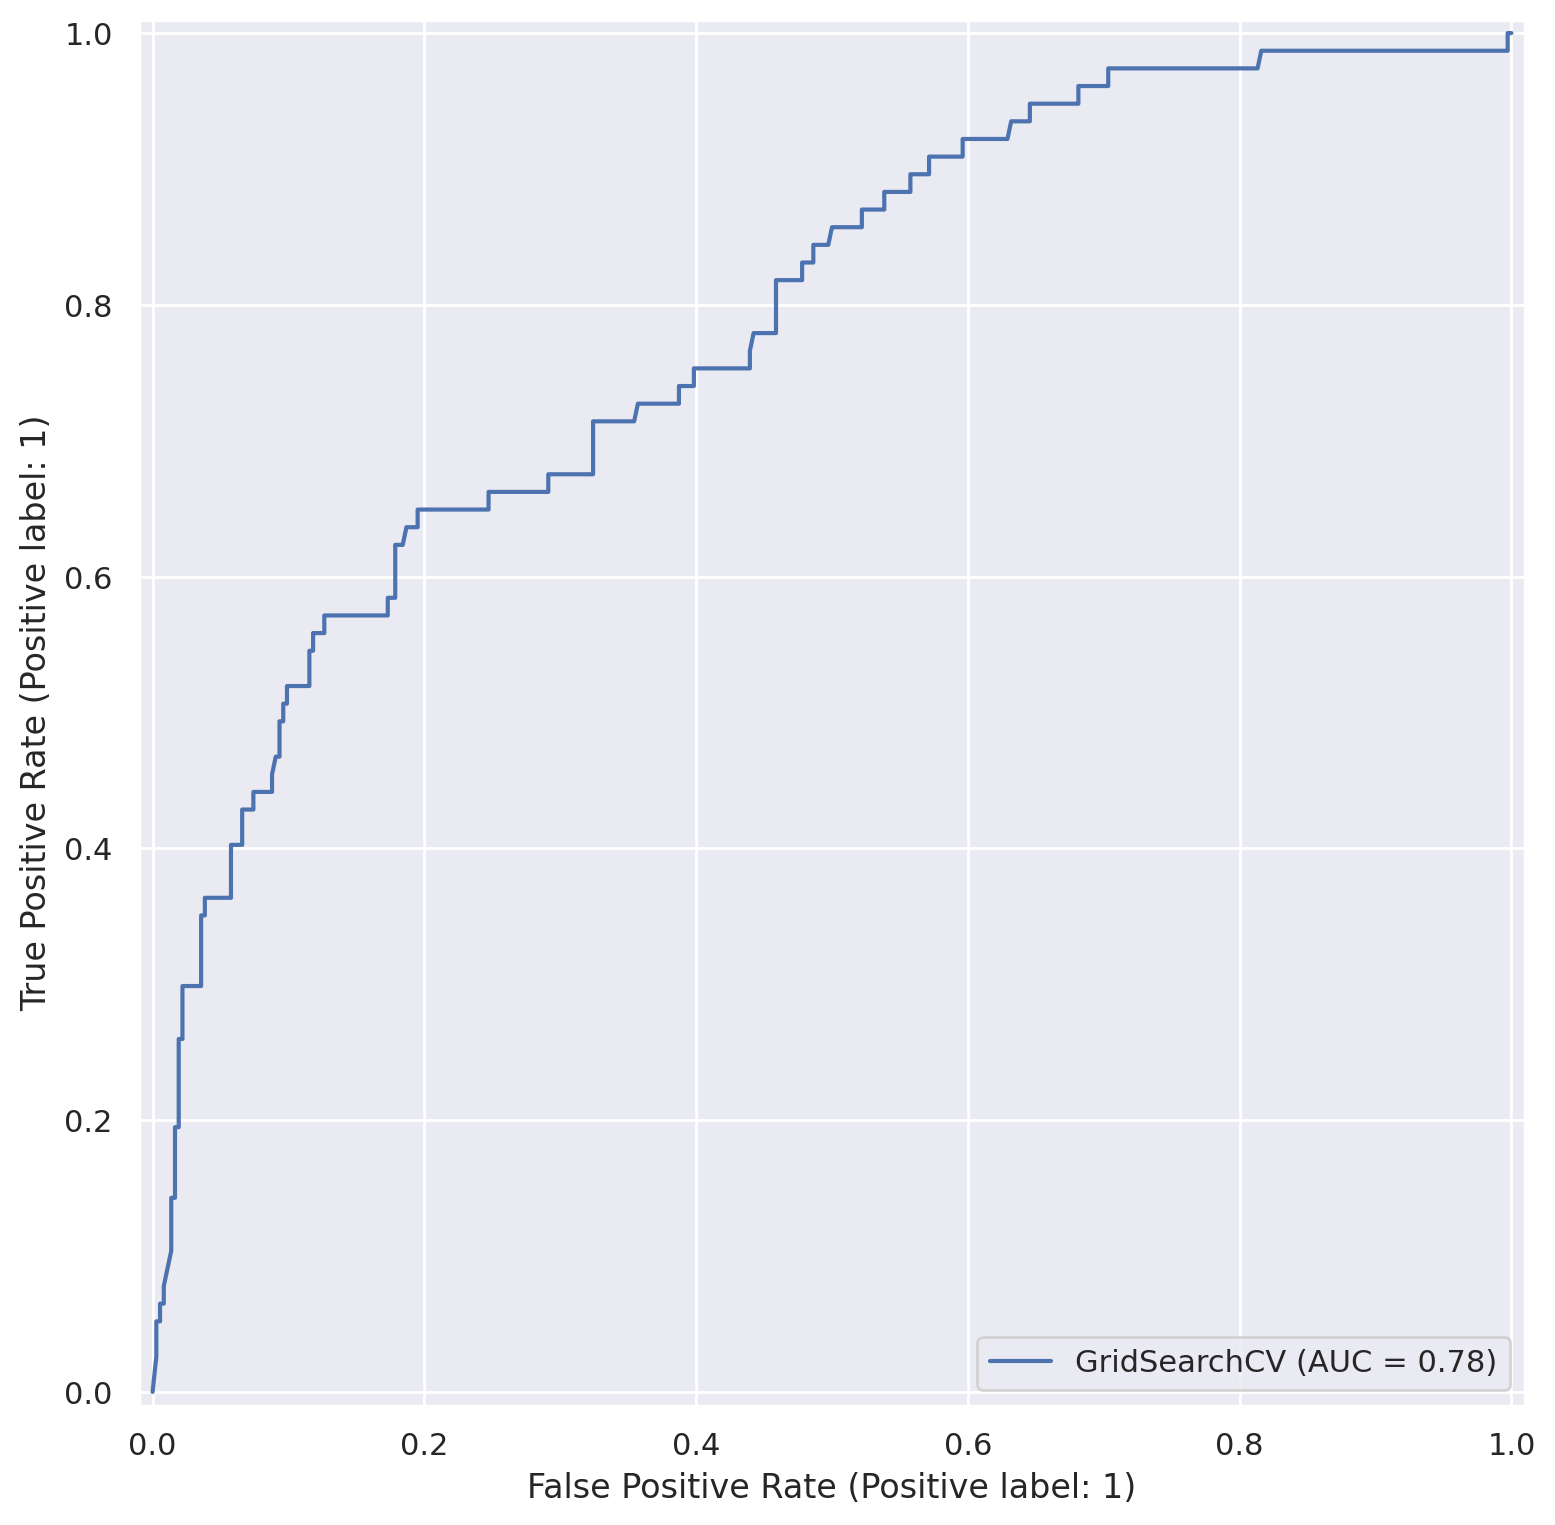

In [149]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(grid_search, X_test, y_test)

### - Hyperparameter Tuning done
### - Best parameters found above
### - Using these parameters on our Random Forest model for most optimal results

In [150]:
best_rf = RandomForestClassifier(bootstrap=True, 
                                 max_depth=8, 
                                 min_samples_leaf=13,
                                 min_samples_split=14, 
                                 n_estimators=725,
                                 random_state=42)

In [151]:
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=13, min_samples_split=14,
                       n_estimators=725, random_state=42)

In [152]:
# Finding the importance of each feature in the model
feature_imp = pd.Series(best_rf.feature_importances_, index=list(X.columns)).sort_values(ascending=False)

In [153]:
print(feature_imp)

Age                 0.296533
YearsAtCompany      0.255998
OverTime            0.251511
StockOptionLevel    0.111252
MaritalStatus       0.084705
dtype: float64


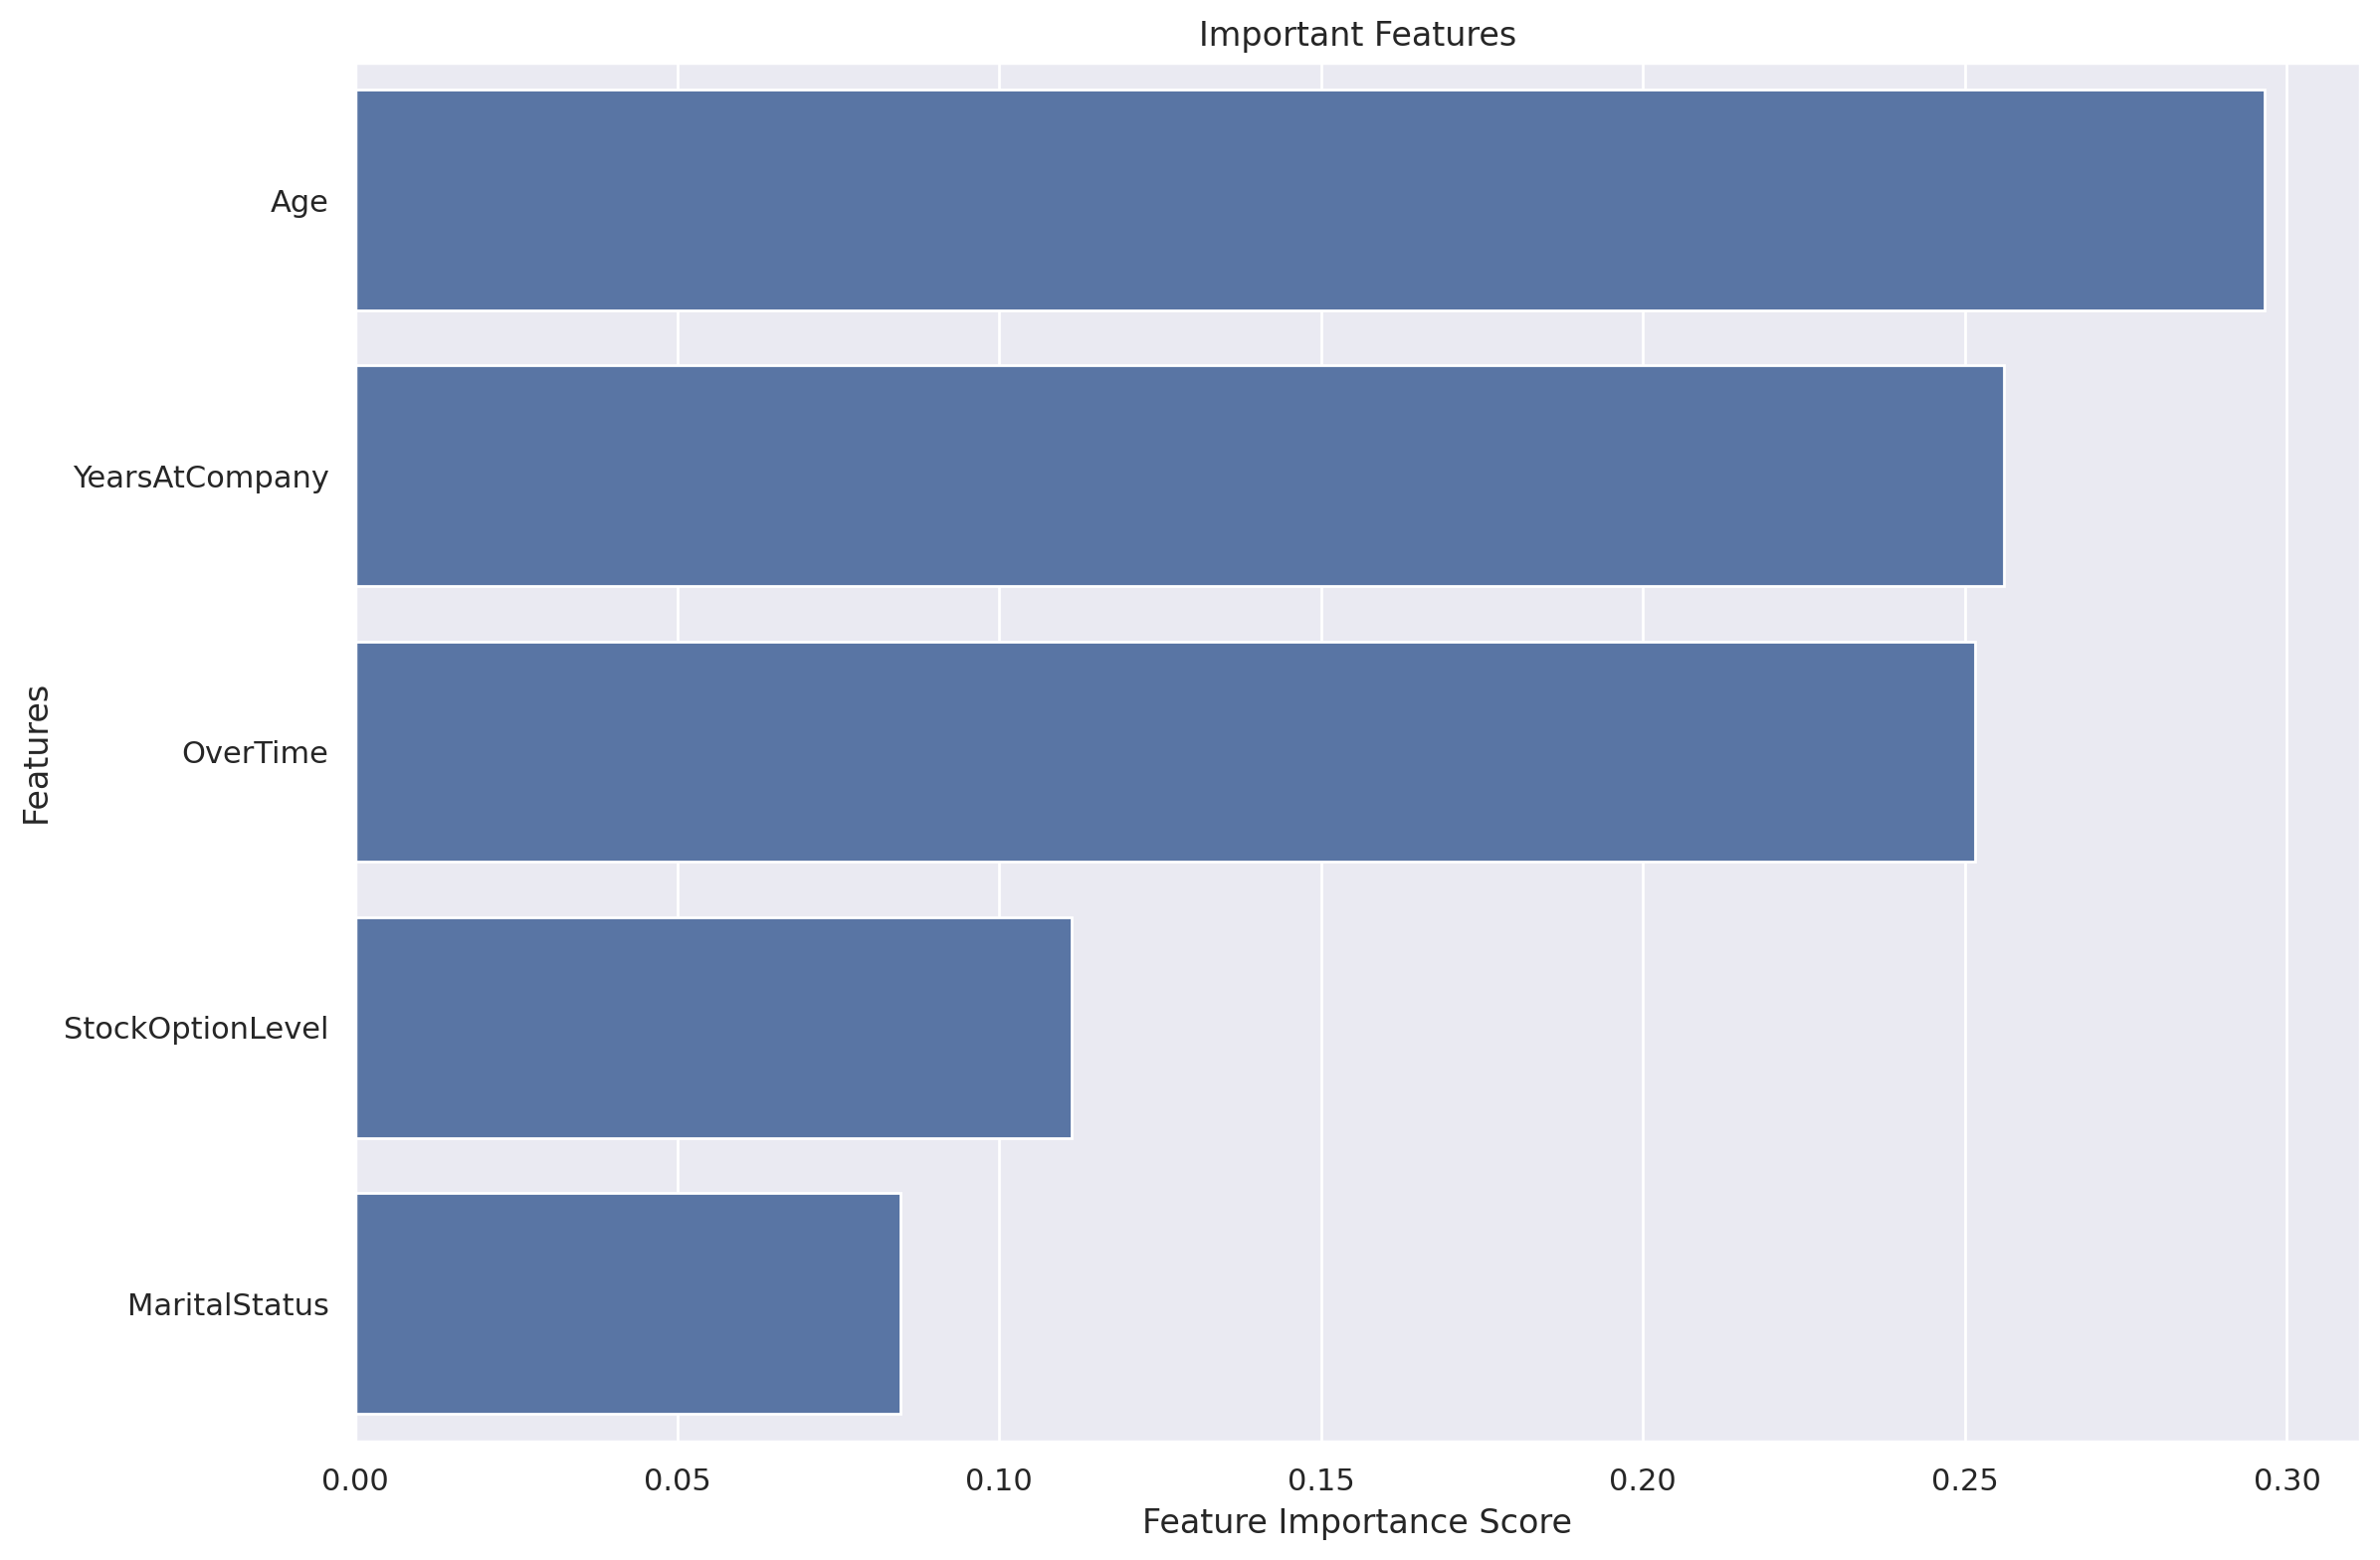

In [154]:
# Creating a bar plot using sns
sns.set(rc={'figure.figsize':(13,9)})
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()